In [152]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## About Food Demand Forecasting Challenge



Demand forecasting is a key component to every growing online business. Without proper demand forecasting processes in place, it can be nearly impossible to have the right amount of stock on hand at any given time. A food delivery service has to deal with a lot of perishable raw materials which makes it all the more important for such a company to accurately forecast daily and weekly demand.

Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks — and push customers to seek solutions from your competitors. In this challenge, get a taste of demand forecasting challenge using a real dataset.

## Problem Statement

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.


The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  


* Historical data of demand for a product-center combination (Weeks: 1 to 145)
* Product(Meal) features such as category, sub-category, current price and discount
* Information for fulfillment center like center area, city information etc.

In [153]:
train = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train Food\train.csv")
meals = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train Food\meal_info.csv")
centre = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\Train Food\fulfilment_center_info.csv")
test = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\test_QoiMO9B.csv")
submission = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\sample_submission_hSlSoT6.csv")

In [154]:
train.shape, meals.shape, centre.shape, test.shape, submission.shape

((456548, 9), (51, 3), (77, 5), (32573, 8), (32573, 2))

In [155]:
pd.set_option("display.max_columns",100)
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [156]:
# Merge the Data
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [157]:
meals.columns

Index(['meal_id', 'category', 'cuisine'], dtype='object')

In [158]:
# We will combine the Train and Meal ID
#pd.merge(train, meals, on = 'meal_id', how = 'left')

# Combine the train and test data

combined = pd.concat([train,test], ignore_index = True)
combined = pd.merge(combined, meals, on = 'meal_id', how = 'left')

In [159]:
# combine Centres using Centre_id

combined = pd.merge(combined, centre, on = 'center_id', how = 'left')

In [160]:
print('Shape of the Data :---> ',combined.shape)

Shape of the Data :--->  (489121, 15)


In [161]:
# Lets Preview the Data 
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0


In [162]:
combined.isnull().sum()

id                           0
week                         0
center_id                    0
meal_id                      0
checkout_price               0
base_price                   0
emailer_for_promotion        0
homepage_featured            0
num_orders               32573
category                     0
cuisine                      0
city_code                    0
region_code                  0
center_type                  0
op_area                      0
dtype: int64

## Univariate Analysis

In [163]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             456548 non-null  float64
 9   category               489121 non-null  object 
 10  cuisine                489121 non-null  object 
 11  city_code              489121 non-null  int64  
 12  region_code            489121 non-null  int64  
 13  center_type            489121 non-null  object 
 14  op_area                489121 non-nu

In [164]:
# Difference in Check out and Base Price
combined['diff_in_price'] = np.abs(combined['base_price'] - combined['checkout_price'])

In [165]:
combined['prop'] = combined.diff_in_price/combined.checkout_price

In [166]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff_in_price,prop
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,15.46,0.112987
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007308
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007415
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0,98.03,0.288748
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0,1.00,0.004107


<AxesSubplot:xlabel='num_orders'>

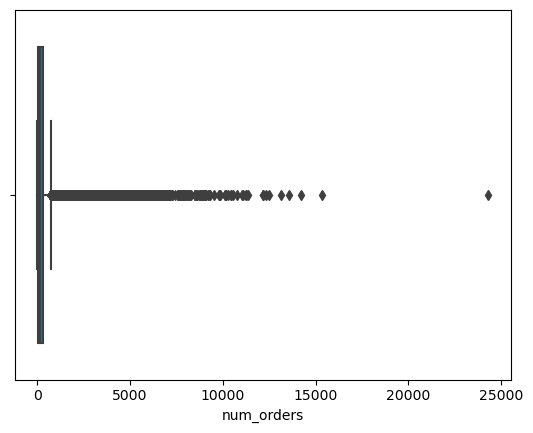

In [167]:
# Plotting the target variarble

sns.boxplot(combined.num_orders)

In [168]:
# Cat vs Target
combined.select_dtypes(include = 'object').columns

Index(['category', 'cuisine', 'center_type'], dtype='object')

In [169]:
cat_cols = ['category', 'cuisine', 'center_type', 'center_id', 'meal_id', 'emailer_for_promotion',
           'homepage_featured', 'city_code', 'region_code']
len(cat_cols)

9

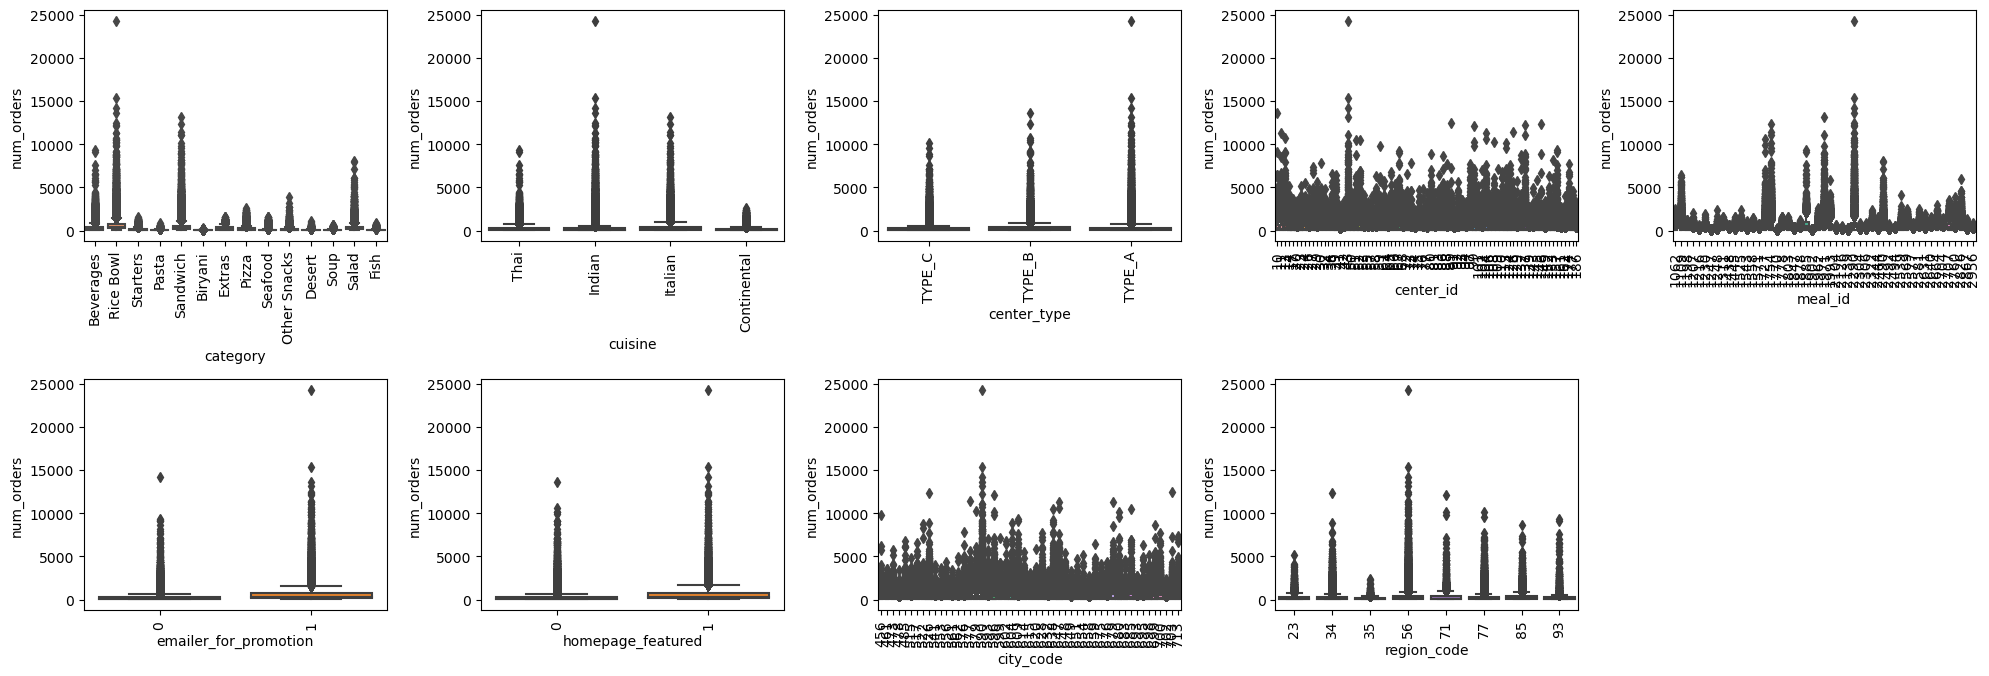

In [170]:
nrows = 3
ncols = 5
repeater = 1
plt.figure(figsize=(20,10))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(combined.loc[:, i],combined.num_orders)
    plt.xticks(rotation = 90)
    repeater+= 1
    
plt.tight_layout()
plt.show()

In [171]:
# Create a New variable called Social media

combined['social_media'] =  combined.emailer_for_promotion+combined.homepage_featured

<AxesSubplot:xlabel='social_media', ylabel='num_orders'>

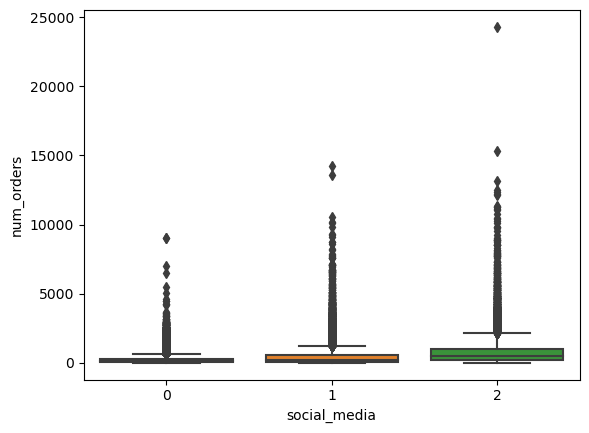

In [172]:
sns.boxplot(combined.social_media, combined.num_orders)

In [173]:
# Combine City Code and Region
combined['region']=combined.city_code.astype('str')+'_'+combined.region_code.astype('str')

<AxesSubplot:xlabel='region', ylabel='num_orders'>

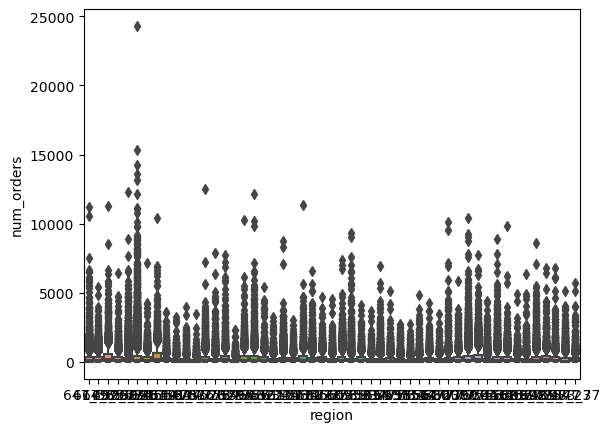

In [174]:
sns.boxplot(combined.region, combined.num_orders)

In [175]:
# Count of City Basis region 
combined['count_city_region'] = combined.groupby('region_code')['city_code'].transform('nunique')

In [176]:
# Count of Orders Basis region 
combined['count_order_region'] = combined.groupby('region_code')['meal_id'].transform('nunique')

In [177]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff_in_price,prop,social_media,region,count_city_region,count_order_region
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,15.46,0.112987,0,647_56,16,51
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007308,0,647_56,16,51
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007415,0,647_56,16,51
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0,98.03,0.288748,0,647_56,16,51
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0,1.00,0.004107,0,647_56,16,51


In [178]:
# Count of cities basis centre type
combined['count_city_centre'] = combined.groupby('center_type')['city_code'].transform('nunique')

In [179]:
# Relation between Cuisine and Meal ID 
combined.groupby('cuisine')['meal_id'].transform('nunique')

0         15
1         15
2         15
3         12
4         12
          ..
489116    12
489117    12
489118    12
489119    12
489120    12
Name: meal_id, Length: 489121, dtype: int64

In [180]:
# City Wise Count of meals 
combined['count_city_orders'] = combined.groupby('city_code')['meal_id'].transform('nunique')

combined['avg_city_orders'] = combined.groupby('city_code')['meal_id'].transform('mean')

combined['median_city_orders'] = combined.groupby('city_code')['meal_id'].transform('median')

combined['std_city_orders'] = combined.groupby('city_code')['meal_id'].transform('std')

In [181]:
# Order count Region Wise 

combined['avg_city_region'] = combined.groupby('region_code')['meal_id'].transform('mean')

combined['median_city_region'] = combined.groupby('region_code')['meal_id'].transform('median')

combined['std_city_region'] = combined.groupby('region_code')['meal_id'].transform('std')

In [182]:
# Category wise Number of orders 
combined['count_order_cat'] = combined.groupby('category')['meal_id'].transform('nunique')

combined['avg_order_cat'] = combined.groupby('category')['meal_id'].transform('mean')

combined['median_order_cat'] = combined.groupby('category')['meal_id'].transform('median')

combined['std_order_cat'] = combined.groupby('category')['meal_id'].transform('std')

In [183]:
# Cuisine wise count of orders....

combined['count_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('nunique')

combined['avg_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('mean')

combined['median_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('median')

combined['std_order_cuisine'] = combined.groupby('cuisine')['meal_id'].transform('std')

In [184]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff_in_price,prop,social_media,region,count_city_region,count_order_region,count_city_centre,count_city_orders,avg_city_orders,median_city_orders,std_city_orders,avg_city_region,median_city_region,std_city_region,count_order_cat,avg_order_cat,median_order_cat,std_order_cat,count_order_cuisine,avg_order_cuisine,median_order_cuisine,std_order_cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,15.46,0.112987,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007308,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007415,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0,98.03,0.288748,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0,1.00,0.004107,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350


In [185]:
combined.select_dtypes(include=np.number).columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area', 'diff_in_price', 'prop', 'social_media',
       'count_city_region', 'count_order_region', 'count_city_centre',
       'count_city_orders', 'avg_city_orders', 'median_city_orders',
       'std_city_orders', 'avg_city_region', 'median_city_region',
       'std_city_region', 'count_order_cat', 'avg_order_cat',
       'median_order_cat', 'std_order_cat', 'count_order_cuisine',
       'avg_order_cuisine', 'median_order_cuisine', 'std_order_cuisine'],
      dtype='object')

In [186]:
num_cols = ['checkout_price', 'base_price','num_orders','diff_in_price',
            'count_city_region', 'count_city_orders',
            'count_order_region', 'count_city_centre',
            'avg_city_orders', 'median_city_orders', 'std_city_orders',
            'avg_city_region', 'median_city_region', 'std_city_region',
            'count_order_cat', 'avg_order_cat', 'median_order_cat', 'std_order_cat',
            'count_order_cuisine', 'avg_order_cuisine', 'median_order_cuisine',
            'std_order_cuisine']

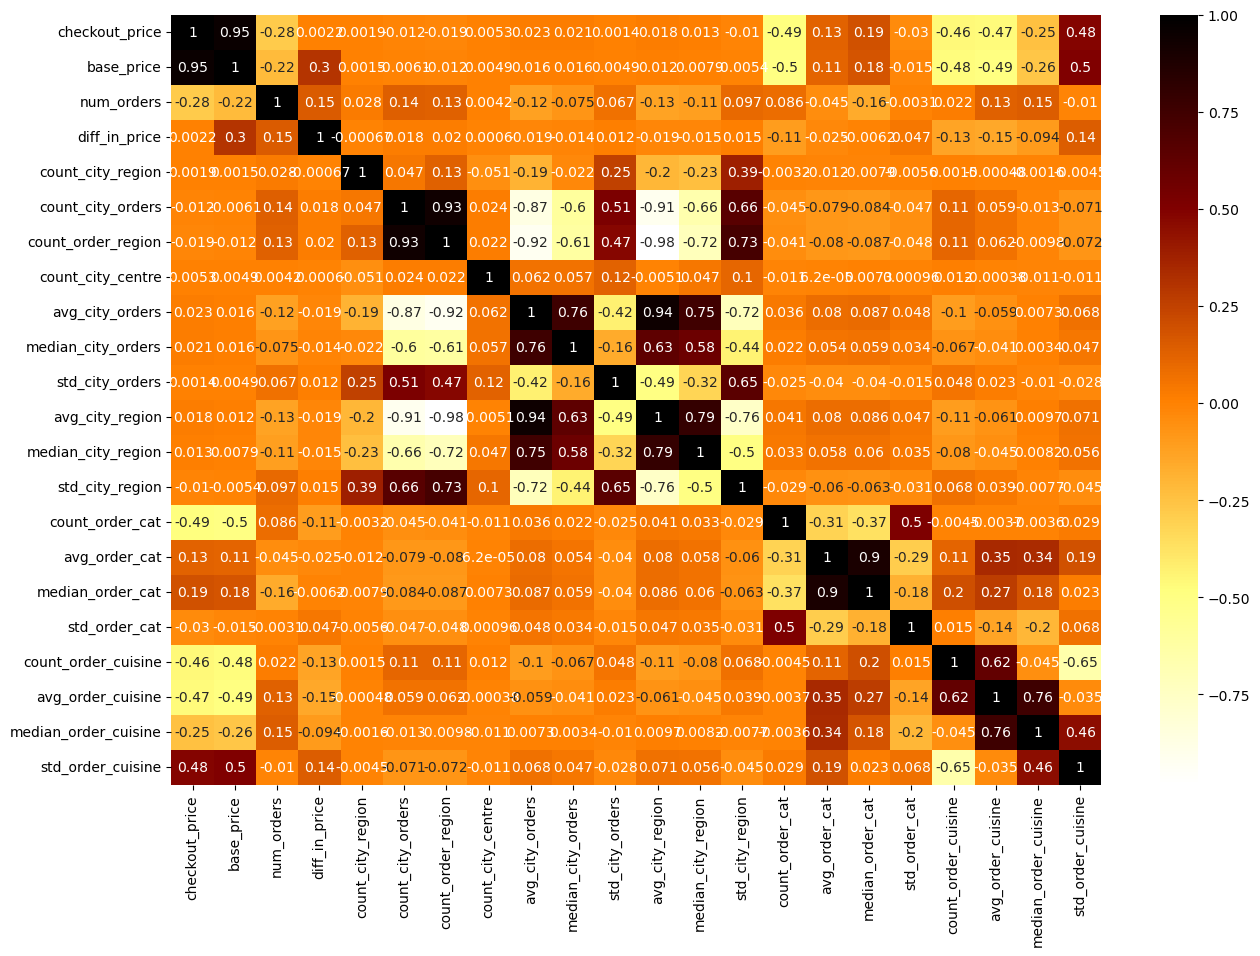

In [187]:
# Lets checks the Correlation with Target 
plt.figure(figsize=(15,10))
sns.heatmap(combined.loc[:, num_cols].corr(), annot = True, cmap = 'afmhot_r')
plt.show()

In [188]:
# Average Orders per week 

combined['count_order_week'] = combined.groupby('week')['meal_id'].transform('nunique')

combined['avg_order_week'] = combined.groupby('week')['meal_id'].transform('mean')

In [191]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff_in_price,prop,social_media,region,count_city_region,count_order_region,count_city_centre,count_city_orders,avg_city_orders,median_city_orders,std_city_orders,avg_city_region,median_city_region,std_city_region,count_order_cat,avg_order_cat,median_order_cat,std_order_cat,count_order_cuisine,avg_order_cuisine,median_order_cuisine,std_order_cuisine,count_order_week,avg_order_week,sine_week,cos_week
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,15.46,0.112987,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836,45,1977.382957,0.120537,0.992709
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007308,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836,45,1977.382957,0.120537,0.992709
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007415,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836,45,1977.382957,0.120537,0.992709
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0,98.03,0.288748,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350,45,1977.382957,0.120537,0.992709
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0,1.00,0.004107,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350,45,1977.382957,0.120537,0.992709


In [190]:
combined['sine_week'] = np.sin((2*np.pi*combined.week)/52)
combined['cos_week'] = np.cos((2*np.pi*combined.week)/52)

In [193]:
# Drop the Unnecessary Variables 
new = combined.drop(['id', 'center_id', 'meal_id', 'city_code', 'region_code', 'emailer_for_promotion',
              'homepage_featured'], axis = 1)

In [195]:
new.columns

Index(['week', 'checkout_price', 'base_price', 'num_orders', 'category',
       'cuisine', 'center_type', 'op_area', 'diff_in_price', 'prop',
       'social_media', 'region', 'count_city_region', 'count_order_region',
       'count_city_centre', 'count_city_orders', 'avg_city_orders',
       'median_city_orders', 'std_city_orders', 'avg_city_region',
       'median_city_region', 'std_city_region', 'count_order_cat',
       'avg_order_cat', 'median_order_cat', 'std_order_cat',
       'count_order_cuisine', 'avg_order_cuisine', 'median_order_cuisine',
       'std_order_cuisine', 'count_order_week', 'avg_order_week', 'sine_week',
       'cos_week'],
      dtype='object')

In [196]:
# Factorize the Cat Vars

new['cuisine'] = pd.factorize(new.cuisine)[0]
new['center_type'] = pd.factorize(new.center_type)[0]
new['category'] = pd.factorize(new.category)[0]
new['op_area'] = pd.factorize(new.op_area)[0]
new['region'] = pd.factorize(new.region)[0]

In [197]:
# Split the Data into train and test

with_outliers_train = new.loc[0:train.shape[0]-1, ]
with_outliers_test = new.loc[train.shape[0]:, ]

X_outliers = with_outliers_train.drop('num_orders', axis = 1)
with_outliers_test = with_outliers_test.drop('num_orders', axis = 1)

y = with_outliers_train.num_orders

In [200]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()

cv = KFold(n_splits=5, random_state=42,shuffle=True)

pred = []
pred_lgbm = []
for train_index, test_index in cv.split(X_outliers,y):
    xtrain=X_outliers.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(with_outliers_test))
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(with_outliers_test))

In [206]:
# Submission

submission['num_orders'] = np.abs(pd.DataFrame(pred).T.mean(axis = 1))
submission.to_csv('XGBModelFood.csv', index = False)

## XGB Model

Your score for this submission is : **72.93494811561243**